In [1]:
import numpy as np
import matplotlib.pyplot as plt

(100, 4)


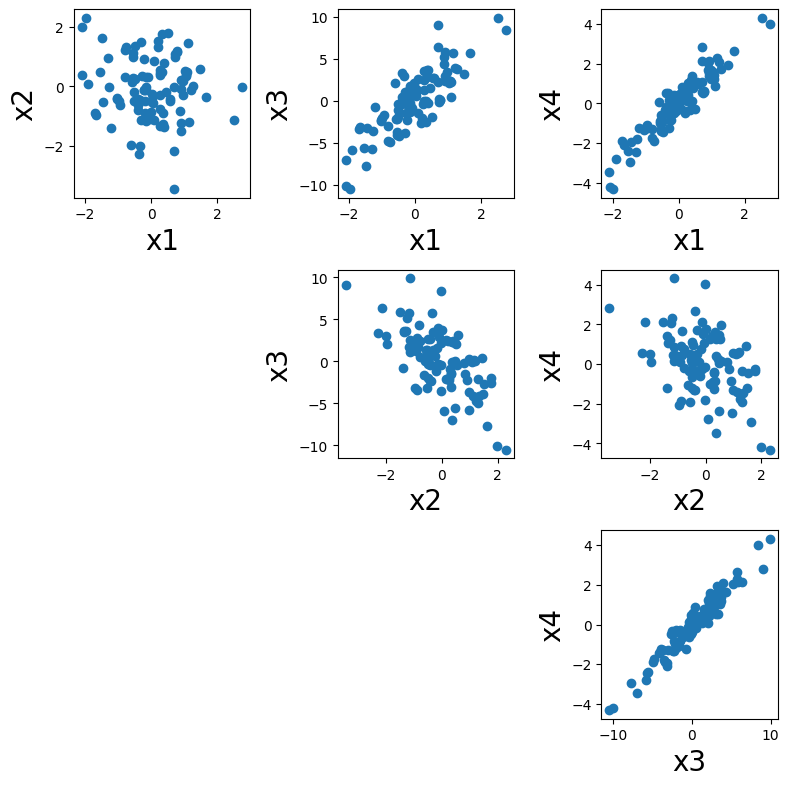

In [15]:
x = np.random.normal(0,1,(100,4))
print(x.shape)
x[:,2] = 3 * x[:,0] - 2 * x[:,1] + np.random.normal(0, 0.1, 100)
x[:,3] = 1.5 * x[:,0] - 0.5 * x[:,1] + np.random.normal(0, 0.1, 100)
plt.figure(figsize=(10,10))
for i in range(4):
    for j in range(4):
        if j > i:
            plt.subplot(4,4,i*4+j+1)
            plt.scatter(x[:,i], x[:,j])
            plt.xlabel(f'x{i+1}', fontsize=20)
            plt.ylabel(f'x{j+1}', fontsize=20)
plt.tight_layout()

In [16]:
x.shape

(100, 4)

In [23]:

class PCA:
    def __init__(self,k_component):
        self.mean = None
        self.k_component = k_component
        self.components = None

    def fit(self,X):
        #get mean
        self.mean = np.mean(X,axis=0,keepdims=True)
        print(self.mean.shape)
        print("Shape of X",X.shape)
        print("Shape of mean",self.mean.shape)
        #centring 
        X = (X - self.mean) /np.std(X,axis =0)
        print("Shape of X after mean centering",X.shape)
        #calculate the covariance,this fucntion takes sample as columns, but in our array we have row wise 
        # arranged it,
        #so either we can do is np.cov(x.T) or np.cov(x, rowvar=False)
        covariance = np.cov(X.T)
        # covariance = np.dot(X.T,X)
        print("shape of covariance", covariance.shape)

        #get eigen value and eigen vector of covariance matrix
        e_values,e_vectors=np.linalg.eig(covariance)
        #this function gives the e_vector in column formate eg-> [:i] for ith eigenVector
        print("shape of e_vectors",e_vectors.shape)
        e_vectors = e_vectors.T
        print("shape of e_vectors after transpose",e_vectors.shape)
        

        # print(e_values)
        #sort the eigenvalues and eigenvectors
        idx = np.argsort(e_values)[::-1]
        # print(idx)
        e_values = e_values[idx]
        e_vectors = e_vectors[idx]

        # print(e_vectors)

        self.components = e_vectors[:self.k_component]


    def transform(self, X):
        # projects data
        X = X - self.mean
        return np.dot(X, self.components.T)
        
    def transform(self,X):
        X = X-self.mean
        projection =  np.dot(X,self.components.T)
        return projection
        
    


# print(x)
mypca =PCA(30)

mypca.fit(x)
mypca.transform(x)
mypca.components

(1, 4)
Shape of X (100, 4)
Shape of mean (1, 4)
Shape of X after mean centering (100, 4)
shape of covariance (4, 4)
shape of e_vectors (4, 4)
shape of e_vectors after transpose (4, 4)


array([[ 0.5014959 , -0.33036928,  0.56747611,  0.5633195 ],
       [-0.4952807 , -0.84897474,  0.09818366, -0.15588102],
       [-0.35704249,  0.00566662, -0.47786965,  0.80257657],
       [-0.61295967,  0.41239049,  0.66330342,  0.11934446]])

In [22]:
#Checking with sklearn version
from sklearn.decomposition import PCA
pca =PCA(n_components=4)
pca.fit(x)
pca.transform(x)
pca.components_


array([[ 0.1929461 , -0.15848007,  0.8949366 ,  0.36978961],
       [ 0.49619268,  0.79432322, -0.10454553,  0.33453502],
       [-0.14473246, -0.32003417, -0.37919571,  0.85606148],
       [ 0.83403665, -0.49143954, -0.2106403 , -0.13601729]])